# 02 - PCA Analysis

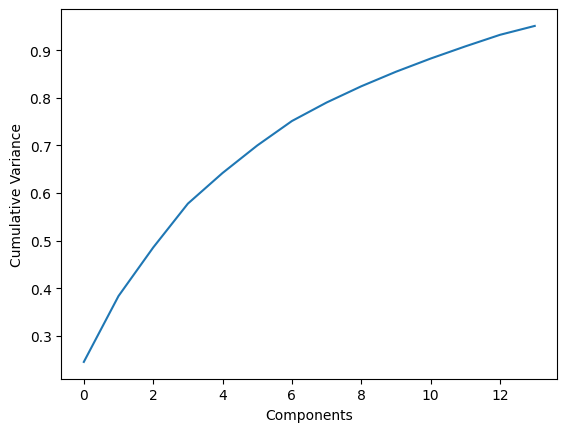

In [1]:
import sys
sys.path.append(r"D:\sprints\Heart_Disease_Project")
from src.utils import load_heart_data, split_features_target, get_feature_groups
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = load_heart_data(r"D:\sprints\Heart_Disease_Project\data\heart_disease.csv", allow_synthetic=True, synthetic_path=r"D:\sprints\Heart_Disease_Project\data\heart_disease.csv")
X, y = split_features_target(df)
num, cat = get_feature_groups(X)
from sklearn.impute import SimpleImputer
pre = ColumnTransformer([
    ('num', Pipeline([('imputer', SimpleImputer(strategy='median')),
                      ('scaler', StandardScaler())]), num),
    ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                      ('onehot', OneHotEncoder(handle_unknown='ignore'))]), cat)
])
X_prep = pre.fit_transform(X)
pca = PCA(n_components=0.95, random_state=42)
import scipy.sparse as sp
X_arr = X_prep.toarray() if sp.issparse(X_prep) else X_prep
X_pca = pca.fit_transform(X_arr)
plt.figure(); plt.plot(pca.explained_variance_ratio_.cumsum()); plt.xlabel('Components'); plt.ylabel('Cumulative Variance'); plt.show()